In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dropout,Dense,Flatten
from tensorflow.keras.models import Model

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train , y_train) , (x_test , y_test) = fashion_mnist.load_data()
x_train , x_test = x_train/255.0 , x_test/255.0
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape


(60000,)

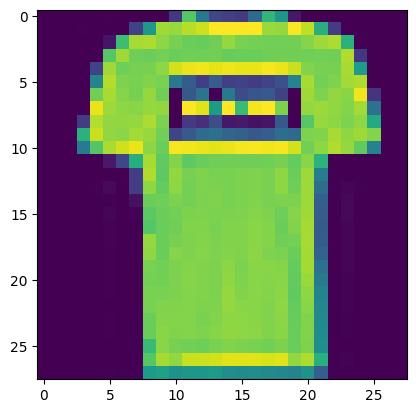

In [5]:

plt.imshow(x_train[1])

In [6]:
x_train = np.expand_dims(x_train ,-1)
x_test = np.expand_dims(x_test , -1)
x_train.shape

(60000, 28, 28, 1)

In [7]:
k = len(set(y_train))
print("number of classes = " ,k)

number of classes =  10


In [8]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32 , (3,3) , strides = 2 , activation ="relu")(i)
x = Conv2D(64 , (3,3) , strides = 2 , activation ="relu")(x)
x = Conv2D(128 , (3,3) , strides = 2 , activation ="relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512 , activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(k , activation="softmax")(x)

model = Model(i,x)

In [9]:
model.compile(optimizer="adam" , loss='sparse_categorical_crossentropy' , metrics = ['accuracy'])

r = model.fit(x_train,y_train,validation_data=(x_test,y_test) , epochs=15)

Epoch 1/15


2023-10-02 16:24:06.424921: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1869/1875 [============================>.] - ETA: 0s - loss: 0.5229 - accuracy: 0.8060

2023-10-02 16:24:18.215843: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 13s 6ms/step - loss: 0.5224 - accuracy: 0.8062 - val_loss: 0.4012 - val_accuracy: 0.8472
Epoch 2/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3594 - accuracy: 0.8657 - val_loss: 0.3449 - val_accuracy: 0.8713
Epoch 3/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3121 - accuracy: 0.8834 - val_loss: 0.3181 - val_accuracy: 0.8825
Epoch 4/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2805 - accuracy: 0.8939 - val_loss: 0.2989 - val_accuracy: 0.8924
Epoch 5/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2515 - accuracy: 0.9043 - val_loss: 0.3038 - val_accuracy: 0.8887
Epoch 6/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2333 - accuracy: 0.9119 - val_loss: 0.2949 - val_accuracy: 0.8999
Epoch 7/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2170 - accuracy: 0.9169 - val_loss: 0.2866 - val_accuracy: 0.9

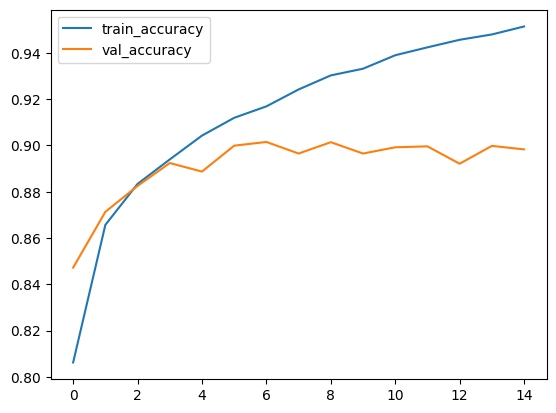

In [10]:
plt.plot(r.history["accuracy"] , label = 'train_accuracy')
plt.plot(r.history["val_accuracy"] , label = 'val_accuracy')
plt.legend()

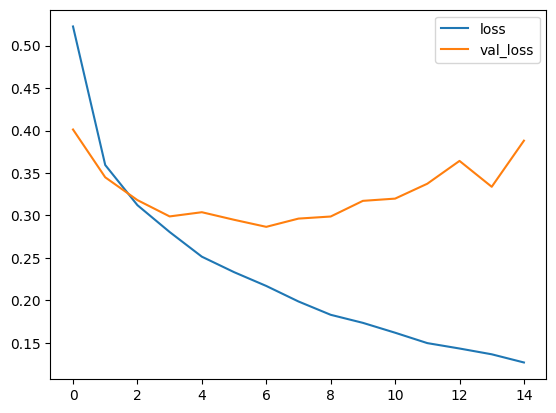

In [11]:
plt.plot(r.history['loss'] , label = "loss")
plt.plot(r.history["val_loss"] , label = "val_loss")
plt.legend()